https://www.python.org/downloads/release/python-364/

In [378]:
import phonetic
import corpus
import generate_sample
import verse
import re
import nltk
import importlib
import string
import seaborn
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
nltk.download('cmudict')
nltk.download('gutenberg')
dictionary = phonetic.PhoneticDictionary()
dictionary.import_file("data/cmudict/cmudict-0.7b")

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Marissa\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Marissa\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Corpus text: 547 words, 256 unique
Need to add 0 words using LOGIOS

Template length:  53 syllables, 37 words

Template:
 How does a bastard, orphan, son of a whore and a scotsman, dropped 	in the middle of a forgotten spot in the caribbean in providence 	impoverished in squalor, grow up to be a hero and a scholar?

Stress pattern:
 [1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0]

Percentile for cutoff: 98.0
Nonzeros before cutoff: 236
Cutoff score:  0.9533233539410668

Pairs to match (7):
  95.9 % match: syllable 2 of orphan + syllable 3 of forgotten
  96.7 % match: syllable 2 of scotsman + syllable 3 of forgotten
  95.8 % match: syllable 2 of forgotten + syllable 1 of spot
  95.3 % match: syllable 1 of caribbean + syllable 2 of squalor
  95.3 % match: syllable 1 of caribbean + syllable 2 of scholar
  96.3 % match: syllable 1 of squalor + syllable 1 of scholar
  100.0 % match: syllable 2 of squalor + syllable 2 of scholar


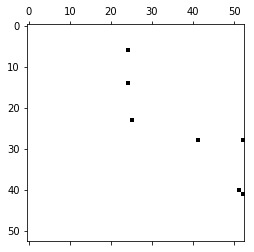

In [47]:
importlib.reload(corpus)
importlib.reload(phonetic)
importlib.reload(generate_sample)
importlib.reload(verse)

corp = corpus.WordCorpus(dictionary)
corp.initialize("alexander_hamilton.txt")

template = verse.VerseTemplate(verse.get_sample(1), dictionary)
template.get_rhyme(verbose=True)
plt.spy(template.rhyme_matrix)
plt.show()

In [413]:
importlib.reload(corpus)
importlib.reload(phonetic)
importlib.reload(generate_sample)
importlib.reload(verse)

corp = corpus.WordCorpus(dictionary)
corp.initialize("alexander_hamilton.txt")
corp.initializeMatrix()

to_add = [4, 8, 27, 36]

def make_template():

    template = verse.VerseTemplate(verse.get_sample(1), dictionary)
    template.get_rhyme()
    for i in to_add:
        template.add_word(template.wordList[i], template.syllable_indices[i])
    return template
        
template = make_template()
print("\nTemplate text:", verse.get_sample(1))
print("\nNumber of syllables in template: ", template.num_syllables)
print("\nInitial template bones:", template.join_template())
print("\nResults:")
for j in range(3):
    print('\n',generate_sample.fill_template(corp, make_template()))

unknowns filename: alexander_hamilton_unknowns.txt
Corpus text: 547 words, 256 unique

Template text: How does a bastard, orphan, son of a whore and a scotsman, dropped in the middle of a forgotten spot in the caribbean in providence impoverished in squalor, grow up to be a hero and a scholar?

Number of syllables in template:  53

Initial template bones: # # / # / orphan # # / whore / / # / # / / # / # / / # / # / / / # / / / # / / / # / / squalor # # # # / # / / / scholar 

Results:

 # # / # / orphan son # a whore and the cousin the damn fool that shot him and a pencil # word got around they said this left him we are waiting in squalor grow up from whence a hero and a scholar 

 # # / # / orphan son # a whore and all the ten his guard up from the bow of / charter and rum and a self starter by providence impoverished in squalor grow up from whence fend coming up a scholar 

 # # / # / orphan son # a whore and he struggled and a lot farther by oh the middle of been dead by working a p

In [402]:
importlib.reload(corpus)
importlib.reload(phonetic)
importlib.reload(generate_sample)
importlib.reload(verse)

corp = corpus.WordCorpus(dictionary)
corp.initialize("/Users/Marissa/cs673/lyrics/nicki_minaj/Anaconda.txt")
corp.initializeMatrix()
corp.add_unknowns("/Users/Marissa/cs673/lyrics/nicki_minaj/Anaconda_LOGIOS.txt")

to_add = []
for w in ["my","dumb","some","kill","chill"]:
    to_add.append(corp.wordDict[w])
locs = [0,9,19,29,39]

def make_template():

    template = verse.VerseTemplate(verse.get_sample(6), dictionary)
    template.get_rhyme()
    for i in range(len(to_add)):
        template.add_word(corp.wordList[to_add[i]], locs[i])
    return template
  
template = make_template()
print("\nTemplate text:", verse.get_sample(6))
print("\nNumber of words in template:", len(template.wordList))
print("\nNumber of syllables in template: ", template.num_syllables)
print("\nInitial template bones:", template.join_template())
print("\nResults:")

for j in range(3):
    print('\n',generate_sample.fill_template(corp, make_template()))

unknowns filename: /Users/Marissa/cs673/lyrics/nicki_minaj/Anaconda_unknowns.txt
Corpus text: 623 words, 179 unique

Template text: My mistress eyes' are nothing like the sun.
	Coral is far more red than her lips red.
	If snow be white, why then her breasts are dun.
	If hair be wires, black wires grow on her head.

Number of words in template: 37

Number of syllables in template:  42

Initial template bones: my # / # # # / # / dumb # / # # # # # / # some # # # # # # / # # kill # # # # / # # / # chill / # 

Results:

 my bitches what yeah # i'm on some dumb shit by the law # a pill i'm on some coins was in my # named troy used to kill who come on some / named troy used to chill / # 

 my purse bitch i make pill i'm on some dumb shit by the big # a pill i'm on some coins was in a # named troy used to kill who see all the / named troy used to chill / # 

 my god look at look pill i'm on some dumb shit by the law # a pill i'm on some coins was in my # named troy used to kill who half a tow

In [418]:
corp = corpus.WordCorpus(dictionary)
corp.initialize(verse.get_sample(4), is_filename=False)
corp.initializeMatrix()
print(corp.A_forward)
print(corp.wordDict["your"], corp.wordDict["you"])
followsleft = np.where(corp.A_forward[22,:]>0)
rightfollows = np.where(corp.A_forward[:,16]>0)
print(np.intersect1d(followsleft, rightfollows).size)
print(np.zeros(0))

unknowns filename: corpus_unknowns.txt
Corpus text: 48 words, 32 unique
[[0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  1.  0. ]
 [0.  0.  0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 0.  0.  0. ]]
20 16
0
[]
